In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
%matplotlib inline

In [2]:
img = cv2.imread('Image.jpg', cv2.IMREAD_COLOR)
#img = cv2.imread('Image.jpg', cv2.IMREAD_GRAYSCALE)

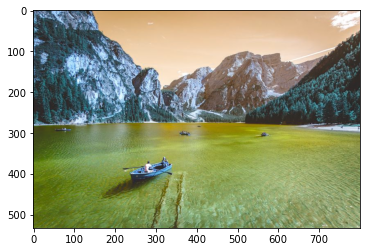

In [3]:
plt.imshow(img)

In [4]:
def findEnergy(image):
    
    filter_du = np.array([[1.0, 2.0, 1.0],[0.0, 0.0, 0.0],[-1.0, -2.0, -1.0],])
    filter_dv = np.array([[1.0, 0.0, -1.0],[2.0, 0.0, -2.0],[1.0, 0.0, -1.0],])

    energy_du = image.copy()
    energy_du[:,:,0] = cv2.filter2D(image[:,:,0], -1, filter_du)
    energy_du[:,:,1] = cv2.filter2D(image[:,:,1], -1, filter_du)
    energy_du[:,:,2] = cv2.filter2D(image[:,:,2], -1, filter_du)

    energy_dv = image.copy()
    energy_dv[:,:,0] = cv2.filter2D(image[:,:,0], -1, filter_dv)
    energy_dv[:,:,1] = cv2.filter2D(image[:,:,1], -1, filter_dv)
    energy_dv[:,:,2] = cv2.filter2D(image[:,:,2], -1, filter_dv)

    energy = np.absolute(energy_du)+np.absolute(energy_dv)
    
    return energy

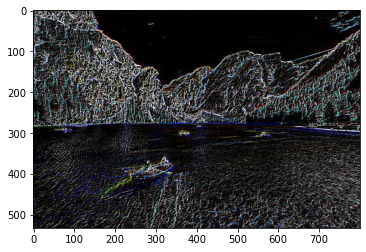

In [5]:
energy = findEnergy(img)
plt.imshow(energy)

In [6]:
def minimumSeam(image):
    row, column, _ = image.shape
    energy_map = findEnergy(image)

    M = energy_map.copy()
    backtrack = np.zeros_like(M, dtype=np.int)

    for i in range(1, row):
        for j in range(0, column):
            
            if j == 0:
                idx = np.argmin(M[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                if idx+j-1<column:
                    backtrack[i, j] = idx + j - 1
                    min_energy = M[i - 1, idx + j - 1]

            M[i, j] += min_energy

    return M, backtrack

In [7]:
def carveColumn(image):
    row, column, _ = image.shape

    M, backtrack = minimumSeam(image)
    
    mask = np.ones((row, column), dtype=np.bool)

    j = np.argmin(M[-1])

    for i in reversed(range(row)):

        mask[i, j] = False
        j = backtrack[i, j, 0]

    mask = np.stack([mask] * 3, axis=2)

    image = image[mask].reshape((row, column - 1, 3))

    return image

In [8]:
def crop_c(image, scale_c):
    row, column, _ = image.shape
    new_c = int(scale_c * column)

    for i in range(column - new_c):
        image = carveColumn(image)

    return image

In [9]:
img = crop_c(img, 0.95)

IndexError: index 1157 is out of bounds for axis 1 with size 787

In [ ]:
plt.imshow(img)